In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import sys
import os
sys.path.append(os.path.abspath(".."))

from src.vector_db.qdrant import get_qdrant_retriever
from test_retrieve import show_statistics

from dotenv import load_dotenv
load_dotenv()

True

## Precision and MAP Formulas

**Precision@k:**
P@k = (число релевантных документов в первых k результатах) / k

**Mean Average Precision (MAP):**
MAP = (1 / N) * Σ (P@i)
где:
   - N = общее число релевантных документов
   - P@i = Precision, вычисленный на каждой позиции i, где документ релевантен



## Блок кода для веры без компьютера

Statistics:
Precision at k: {'pk@1': 0.0, 'pk@2': 0.0, 'pk@3': 0.0, 'pk@4': 0.05, 'pk@5': 0.08, 'pk@10': 0.1}
Mean Average Precision: 0.08092063492063492


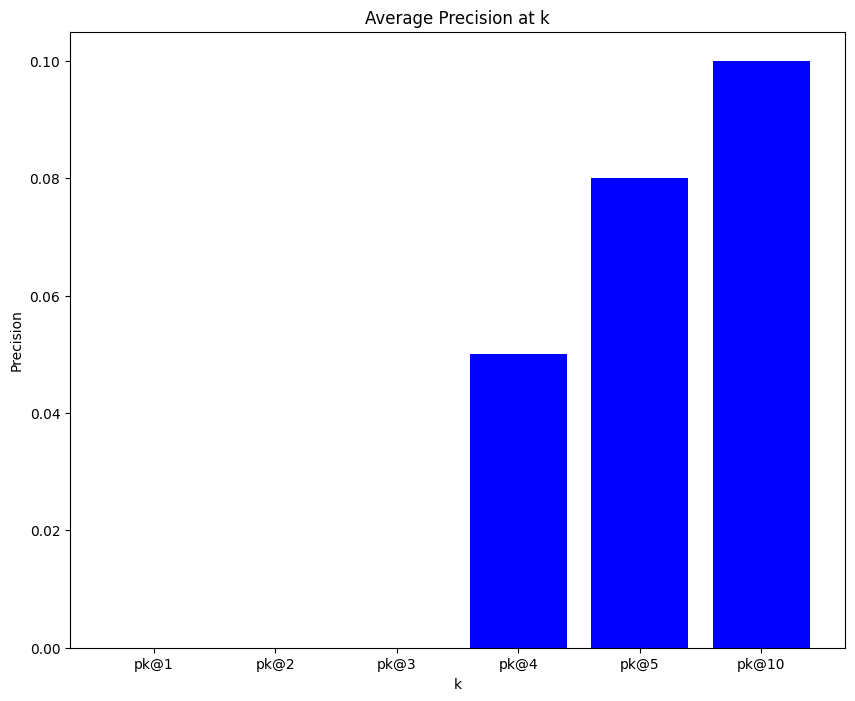

In [2]:
import pandas as pd
import random

data = {
    "question": [
        "What is the capital of France?",
        "Explain the theory of relativity",
        "What are the symptoms of COVID-19?",
        "How to bake a cake?",
        "What is quantum computing?"
    ],
    "gold_urls": [
        [f"https://gold.france.com/doc_{i}" for i in range(10)],
        [f"https://gold.physics.com/doc_{i}" for i in range(10)],
        [f"https://gold.health.com/doc_{i}" for i in range(10)],
        [f"https://gold.cooking.com/doc_{i}" for i in range(10)],
        [f"https://gold.tech.com/doc_{i}" for i in range(10)],
    ]
}

df = pd.DataFrame(data)

class MockDocument:
    def __init__(self, link, score):
        self.metadata = {"link": link}
        self.score = score

class MockRetriever:
    def __init__(self, total_docs=10):
        self.total_docs = total_docs

    def get_relevant_documents(self, query):
        documents = [
            MockDocument(f"https://mocksite.com/doc_{i}", random.uniform(0, 0.5))
            for i in range(self.total_docs - 5)
        ]

        relevant_docs = [
            MockDocument(link, random.uniform(0.8, 1))
            for link in random.sample(data["gold_urls"][random.randint(0, len(data["gold_urls"]) - 1)], k=5)
        ]

        documents.extend(relevant_docs)
        documents = sorted(documents, key=lambda x: x.score, reverse=True)
        return documents[:self.total_docs]

retriever = MockRetriever(total_docs=10)

show_statistics(df, retriever)


## Retrieve metrics

In [ ]:
df = pd.read_csv("data_with_labels.csv")

In [ ]:
retriever = get_qdrant_retriever()
qdrant_retriever = retriever.as_retriever(search_kwargs={"k": 10}, verbose=True)

In [ ]:

show_statistics(df, qdrant_retriever)

## Generation metrics